# DI 6.2 - Exploring Relationships

## This script contains the following
#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
        Correlation
        Scatterplots
        Pair Plots
        Categorical Plots

### 1. Importing Libraries and Data

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
# Checkiong version of Matplotlib

matplotlib.__version__

'3.10.0'

In [6]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Improting Data

GADS = pd.read_csv(r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis\02 Data\Prepared Data\GADS_6.1.csv', index_col = False)

In [8]:
# Generating Path

path = r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis'

In [9]:
path

'D:\\Career Foundry\\2) Data Immersion\\6) Advanced Analytics & Dashboard Design\\DI 6 - Jupyter Folder\\EMPRES Global Animal Disease Surveillance Analysis'

### 2. Data Cleaning

In [11]:
GADS.shape

(17008, 24)

In [12]:
GADS.columns

Index(['Unnamed: 0', 'ID', 'Latitude', 'Longitude', 'Region', 'Country',
       'City/Providence', 'Locality', 'LocalityQuality', 'Observe Date',
       'Report Date', 'Status', 'Disease', 'Serotypes', 'Sp. Description',
       'Sum Sp.AtRisk', 'Sum Sp.Cases', 'Sum Sp.Deaths', 'Sum Sp.Destroyed',
       'Sum Sp.Slaughtered', 'Humans Gender', 'Humans Age', 'Humans Affected',
       'Humans Deaths'],
      dtype='object')

#### Dropping columns

In [14]:
# Drop column 'Unnamed: 0'

GADS = GADS.drop(columns = ['Unnamed: 0'])

In [15]:
GADS.dtypes

ID                      int64
Latitude              float64
Longitude             float64
Region                 object
Country                object
City/Providence        object
Locality               object
LocalityQuality        object
Observe Date           object
Report Date            object
Status                 object
Disease                object
Serotypes              object
Sp. Description        object
Sum Sp.AtRisk         float64
Sum Sp.Cases          float64
Sum Sp.Deaths         float64
Sum Sp.Destroyed      float64
Sum Sp.Slaughtered    float64
Humans Gender          object
Humans Age            float64
Humans Affected       float64
Humans Deaths         float64
dtype: object

In [16]:
# Allowing for full few of all columns

pd.set_option('display.max_columns', 23)

In [17]:
GADS.head()

,ID,Latitude,Longitude,Region,Country,City/Providence,Locality,LocalityQuality,Observe Date,Report Date,Status,Disease,Serotypes,Sp. Description,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Gender,Humans Age,Humans Affected,Humans Deaths
0,230399,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
1,230381,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,18/08/2017,Confirmed,African swine fever,NaN,"domestic, swine",122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,230333,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,16/08/2017,Confirmed,Foot and mouth disease,NaN,"domestic, cattle",1283.0,112.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
3,230396,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"wild, unspecified bird",0.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
4,230371,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,17/08/2017,Confirmed,African swine fever,NaN,"wild, wild boar",0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN


#### Missing Value Check

In [19]:
# Checking Missing Values

GADS.isnull().sum()

ID                        0
Latitude                  0
Longitude                 0
Region                    0
Country                   0
City/Providence           0
Locality                  0
LocalityQuality           0
Observe Date            502
Report Date               0
Status                    0
Disease                   0
Serotypes              6941
Sp. Description        1648
Sum Sp.AtRisk             0
Sum Sp.Cases              0
Sum Sp.Deaths             0
Sum Sp.Destroyed          0
Sum Sp.Slaughtered        0
Humans Gender         16648
Humans Age            15940
Humans Affected       15591
Humans Deaths         16557
dtype: int64

In [20]:
# Missing values cannot be dropped or imputed for risk of damaging the data set.

#### Duplicates

In [22]:
# Finding Duplicates

GADS_dups = GADS[GADS.duplicated()]

In [23]:
GADS_dups

,ID,Latitude,Longitude,Region,Country,City/Providence,Locality,LocalityQuality,Observe Date,Report Date,Status,Disease,Serotypes,Sp. Description,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Gender,Humans Age,Humans Affected,Humans Deaths


In [24]:
# No duplicates found

#### Mix Type Data

In [26]:
# Searching for mix type data

for col in GADS.columns.tolist():
      weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (GADS[weird]) > 0:
        print (col)

Observe Date
Serotypes
Sp. Description
Humans Gender


C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\666244196.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\666244196.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\666244196.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\666244196.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\666244

In [27]:
# Addressing Mixed Data

GADS['Observe Date'] = GADS['Observe Date'].astype('str')

In [28]:
GADS['Serotypes'] = GADS['Serotypes'].astype('str')

In [29]:
GADS['Sp. Description'] = GADS['Sp. Description'].astype('str')

In [30]:
GADS['Humans Gender'] = GADS['Humans Gender'].astype('str')

In [31]:
# Double checking mix type data was corrected

for col in GADS.columns.tolist():
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (GADS[weird]) > 0:
    print (col)

C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\3540701407.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\3540701407.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\3540701407.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\3540701407.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (GADS[[col]].applymap(type) != GADS[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\35

In [32]:
# No remaining mix data types

#### Vars List

In [34]:
GADS.dtypes

ID                      int64
Latitude              float64
Longitude             float64
Region                 object
Country                object
City/Providence        object
Locality               object
LocalityQuality        object
Observe Date           object
Report Date            object
Status                 object
Disease                object
Serotypes              object
Sp. Description        object
Sum Sp.AtRisk         float64
Sum Sp.Cases          float64
Sum Sp.Deaths         float64
Sum Sp.Destroyed      float64
Sum Sp.Slaughtered    float64
Humans Gender          object
Humans Age            float64
Humans Affected       float64
Humans Deaths         float64
dtype: object

In [35]:
# Excluding string/object columns from Dataframe

vars_list = ['ID', 'Latitude', 'Longitude', 'Sum Sp.AtRisk', 'Sum Sp.Cases', 'Sum Sp.Deaths', 'Sum Sp.Destroyed', 'Sum Sp.Slaughtered', 'Humans Age', 'Humans Affected', 'Humans Deaths']

In [36]:
# Checking Varslist

vars_list

['ID',
 'Latitude',
 'Longitude',
 'Sum Sp.AtRisk',
 'Sum Sp.Cases',
 'Sum Sp.Deaths',
 'Sum Sp.Destroyed',
 'Sum Sp.Slaughtered',
 'Humans Age',
 'Humans Affected',
 'Humans Deaths']

In [37]:
# VarsList with path

GADS_vars = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'GADS_6.1.csv'), usecols = vars_list)

In [38]:
# Checking Datafram with Varslist is correct

GADS_vars.head()

,ID,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Age,Humans Affected,Humans Deaths
0,230399,-27.900000,30.800000,248000.0,12.0,12.0,50000.0,0.0,0.0,NaN,NaN
1,230381,54.837037,73.354155,122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN
2,230333,-21.077740,30.211620,1283.0,112.0,0.0,0.0,7.0,NaN,NaN,NaN
3,230396,-26.000000,28.300000,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,230371,49.237900,17.700200,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN


### 3. Exploring Relationships

In [40]:
# Create a correlation matrix using pandas

GADS_vars.corr()

,ID,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Age,Humans Affected,Humans Deaths
ID,1.000000,-0.037381,0.147364,0.070164,0.013929,-0.006458,0.077125,0.008838,1.244136e-01,-1.327000e-02,0.220012
Latitude,-0.037381,1.000000,-0.321740,-0.061963,-0.019116,-0.036776,-0.031517,-0.030578,-2.610978e-01,1.608280e-01,0.044886
Longitude,0.147364,-0.321740,1.000000,0.087314,0.006554,0.021503,0.153179,-0.016073,2.576643e-01,-6.282209e-03,0.098718
Sum Sp.AtRisk,0.070164,-0.061963,0.087314,1.000000,0.255658,0.243797,0.759835,0.108647,-6.438025e-02,-5.823955e-02,-0.174451
Sum Sp.Cases,0.013929,-0.019116,0.006554,0.255658,1.000000,0.674667,0.127143,0.005557,-1.040616e-01,-4.362408e-02,-0.130595
Sum Sp.Deaths,-0.006458,-0.036776,0.021503,0.243797,0.674667,1.000000,0.154376,0.016741,-9.178768e-02,NaN,NaN
Sum Sp.Destroyed,0.077125,-0.031517,0.153179,0.759835,0.127143,0.154376,1.000000,-0.002267,-9.277031e-02,-5.823955e-02,-0.174451
Sum Sp.Slaughtered,0.008838,-0.030578,-0.016073,0.108647,0.005557,0.016741,-0.002267,1.000000,-2.014992e-02,NaN,NaN
Humans Age,0.124414,-0.261098,0.257664,-0.064380,-0.104062,-0.091788,-0.092770,-0.020150,1.000000e+00,2.827057e-17,0.078993
Humans Affected,-0.013270,0.160828,-0.006282,-0.058240,-0.043624,NaN,-0.058240,NaN,2.827057e-17,1.000000e+00,0.056262


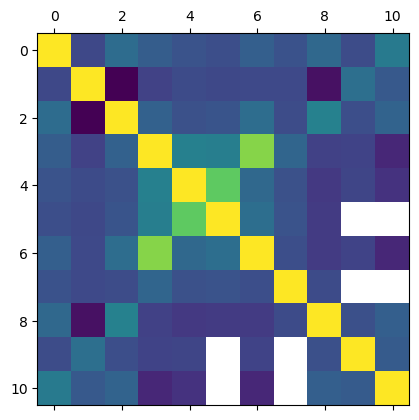

In [41]:
# Creating a carrelation heatmap using matplotlib

plt.matshow(GADS_vars.corr())
plt.show()

In [42]:
# Saving Figure

plt.matshow(GADS_vars.corr())
plt.savefig("GADS Correlation.png")

# This will save the image in the working directory.

In [43]:
# Currentl Directory

cwd = os.getcwd()
cwd

'D:\\Career Foundry\\2) Data Immersion\\6) Advanced Analytics & Dashboard Design\\DI 6 - Jupyter Folder\\EMPRES Global Animal Disease Surveillance Analysis\\03 Scripts'

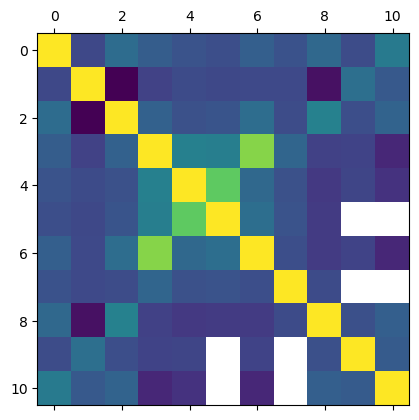

<Figure size 800x800 with 0 Axes>

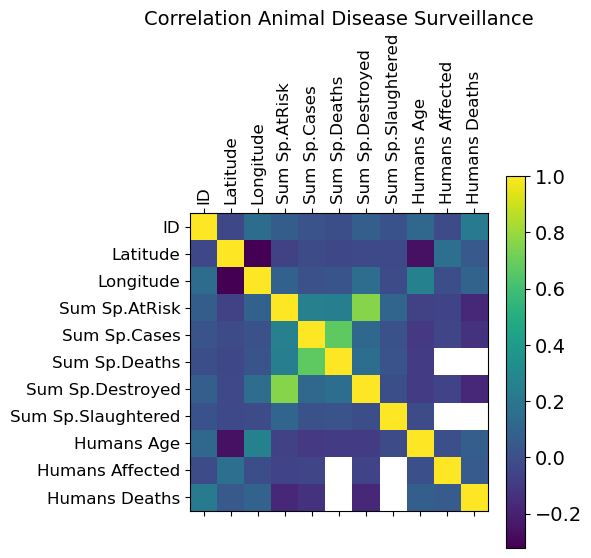

In [44]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(GADS_vars.corr()) # type of plot, use f.number to make it clear which figure to use.
plt.xticks(range(GADS_vars.shape[1]), GADS_vars.columns, fontsize=12, rotation=90) # x axis labels, use GADS_vars.columns
plt.yticks(range(GADS_vars.shape[1]), GADS_vars.columns, fontsize=12
        ) # y axis labels, use GADS_vars.columns
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Animal Disease Surveillance', fontsize=14) # add title
plt.show() # added to show the plot

In [45]:
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(GADS_vars.corr()) # type of plot, use f.number to make it clear which figure to use.
plt.xticks(range(GADS_vars.shape[1]), GADS_vars.columns, fontsize=8, rotation=90) # x axis labels, use GADS_vars.columns
plt.yticks(range(GADS_vars.shape[1]), GADS_vars.columns, fontsize=8
        ) # y axis labels, use GADS_vars.columns
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Animal Disease Surveillance', fontsize=10) # add title
plt.savefig("GADS Correlation with labels.png")

#### Create a correlation heatmap using seaborn:

In [47]:
GADS_vars.columns

Index(['ID', 'Latitude', 'Longitude', 'Sum Sp.AtRisk', 'Sum Sp.Cases',
       'Sum Sp.Deaths', 'Sum Sp.Destroyed', 'Sum Sp.Slaughtered', 'Humans Age',
       'Humans Affected', 'Humans Deaths'],
      dtype='object')

In [48]:
# Create a Subset excluding 'ID', 'Humans Age', 'Humans Affected', 'Humans Deaths'

GADSub = GADS_vars[['Latitude', 'Longitude', 'Sum Sp.AtRisk', 'Sum Sp.Cases',
       'Sum Sp.Deaths', 'Sum Sp.Destroyed', 'Sum Sp.Slaughtered',]]

In [49]:
GADSub

,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered
0,-27.900000,30.800000,248000.0,12.0,12.0,50000.0,0.0
1,54.837037,73.354155,122.0,6.0,1.0,0.0,0.0
2,-21.077740,30.211620,1283.0,112.0,0.0,0.0,7.0
3,-26.000000,28.300000,0.0,1.0,1.0,0.0,0.0
4,49.237900,17.700200,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
17003,7.289176,8.857676,0.0,0.0,0.0,0.0,0.0
17004,15.112823,-23.645005,0.0,0.0,0.0,0.0,0.0
17005,6.658696,2.489576,0.0,0.0,0.0,0.0,0.0
17006,7.143645,3.278189,0.0,0.0,0.0,0.0,0.0


<Figure size 800x800 with 0 Axes>

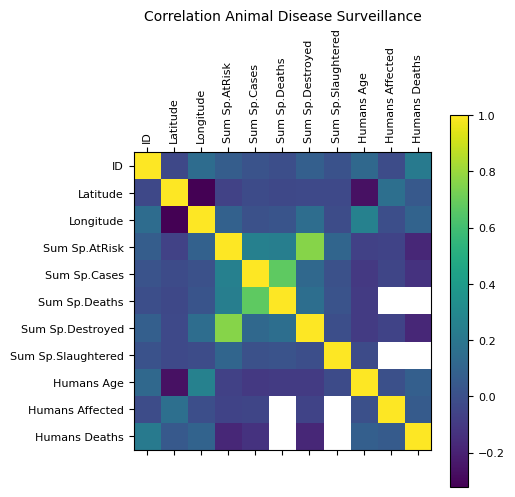

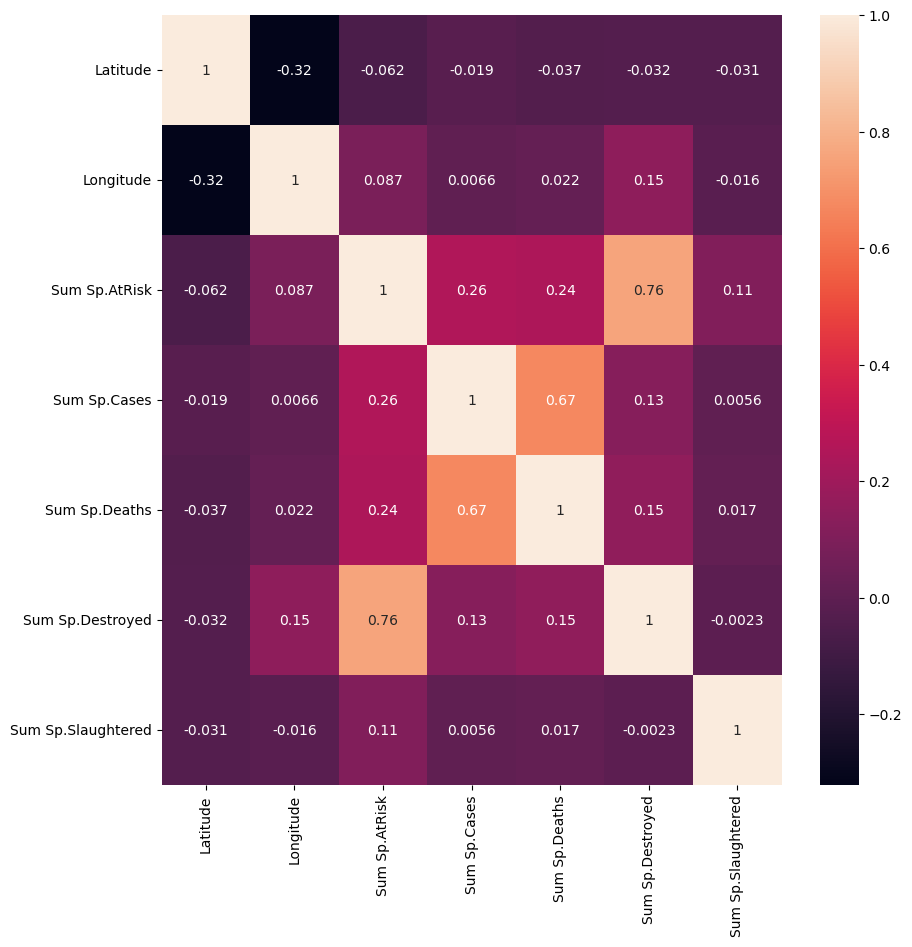

In [50]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(GADSub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.show()

In [51]:
# Saving Figure

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(GADSub.corr(), annot = True, ax = ax)
plt.savefig('Heat Correlation Map.png', dpi=300, bbox_inches='tight')


# This will save the image in the working directory.

In [52]:
plt.savefig("Heat Correlation Map.png")

#### Scatterplots

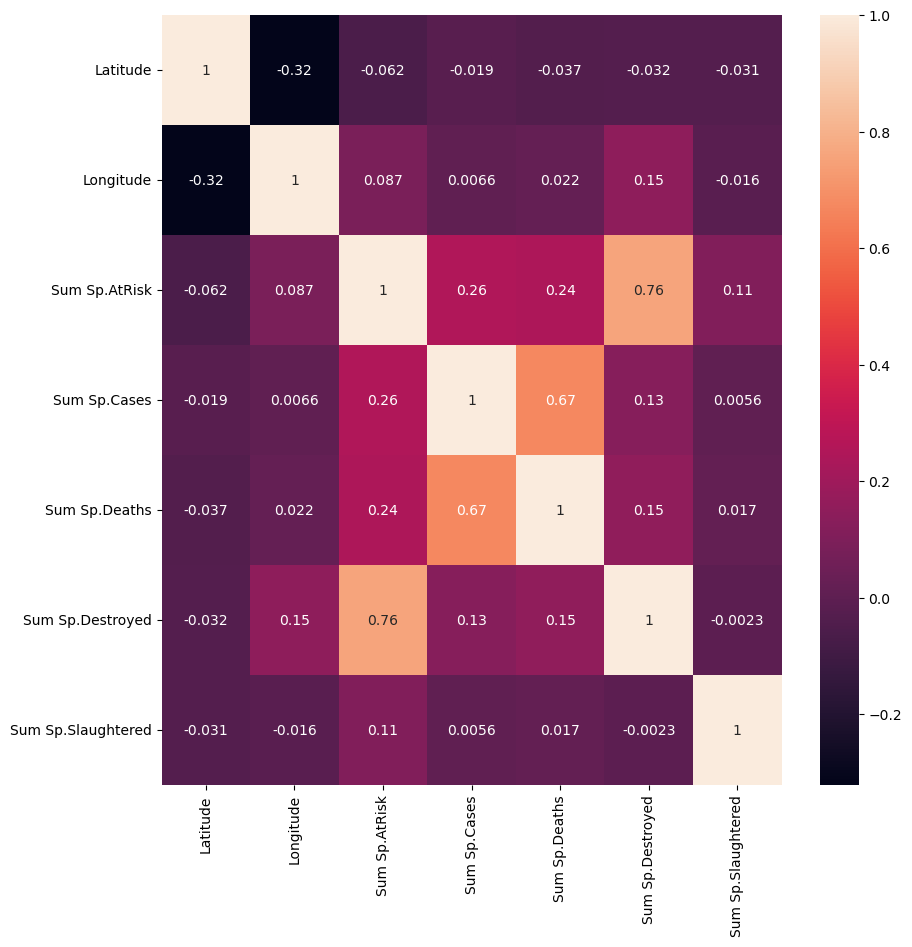

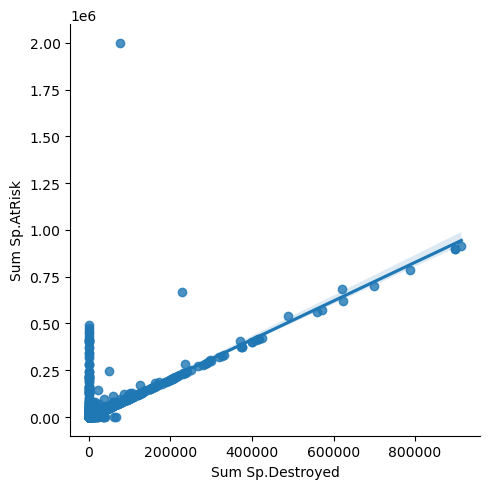

In [54]:
# creating a scatterplot for the "Sum Sp.Destroyed" and "Sum Sp.AtRisk"

sns.lmplot(x ='Sum Sp.Destroyed', y = 'Sum Sp.AtRisk', data = GADSub)
plt.show()

In [55]:
# Saving Figure

sns.lmplot(x ='Sum Sp.Destroyed', y = 'Sum Sp.AtRisk', data = GADSub)
plt.savefig("Scatterplot_Destroyed_AtRisk.png")

# This will save the image in the working directory.

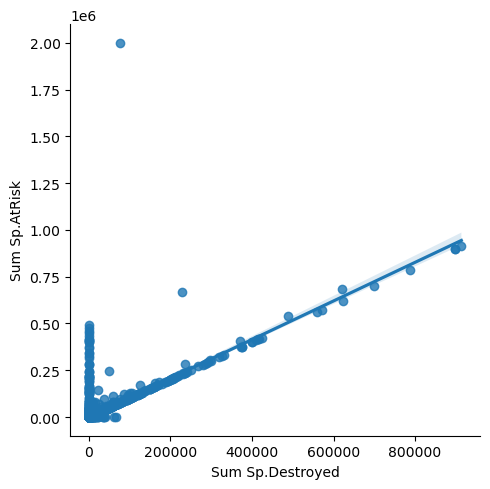

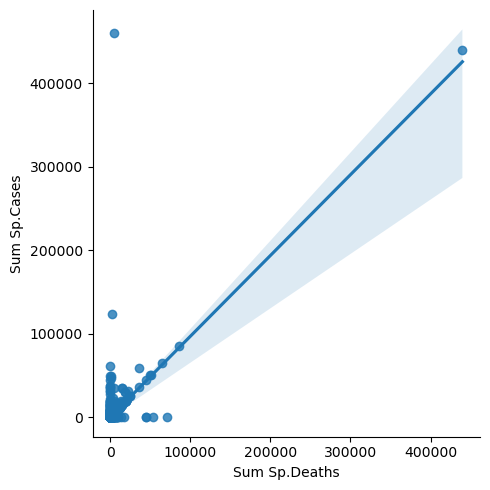

In [56]:
# creating a scatterplot for the "Sum Sp.Death" and "Sum Sp.Cases"

sns.lmplot(x ='Sum Sp.Deaths', y = 'Sum Sp.Cases', data = GADSub)
plt.show()

In [57]:
# Saving Figure

sns.lmplot(x ='Sum Sp.Deaths', y = 'Sum Sp.Cases', data = GADSub)
plt.savefig("Scatterplot_Deaths_Cases.png")

# This will save the image in the working directory.

In [58]:
GADSub.head()

,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered
0,-27.900000,30.800000,248000.0,12.0,12.0,50000.0,0.0
1,54.837037,73.354155,122.0,6.0,1.0,0.0,0.0
2,-21.077740,30.211620,1283.0,112.0,0.0,0.0,7.0
3,-26.000000,28.300000,0.0,1.0,1.0,0.0,0.0
4,49.237900,17.700200,0.0,1.0,1.0,0.0,0.0


In [59]:
GADSub.isnull().sum()

Latitude              0
Longitude             0
Sum Sp.AtRisk         0
Sum Sp.Cases          0
Sum Sp.Deaths         0
Sum Sp.Destroyed      0
Sum Sp.Slaughtered    0
dtype: int64

In [60]:
# Keeping only the variable I want to see in my Pair Plot

GADSub2 = GADSub[['Sum Sp.AtRisk', 'Sum Sp.Cases', 'Sum Sp.Deaths', 'Sum Sp.Destroyed', 'Sum Sp.Slaughtered']]
# The Longitude, Latitude, and Human columns don't provide much information so they are excluded in this subset.

In [61]:
GADSub2

,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered
0,248000.0,12.0,12.0,50000.0,0.0
1,122.0,6.0,1.0,0.0,0.0
2,1283.0,112.0,0.0,0.0,7.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
17003,0.0,0.0,0.0,0.0,0.0
17004,0.0,0.0,0.0,0.0,0.0
17005,0.0,0.0,0.0,0.0,0.0
17006,0.0,0.0,0.0,0.0,0.0


##### There has been extreme difficulty in running the pair plot code. I have tried using samples of 2000, 1000 and 500 with no luck. Using Gemini AI I am attempting to run the code and close the code so that I can continue to use the kernel. In the past each time I attempt to run the pair plot code even with small samples the kernel freezes and must be shut down.

In [63]:
# An additional subset is necessary to limmit the amount of rows for, as the pair plot code is memory intensive on my PC.
# Subset by Simple Random sampling

n_rows_desired = 500
GADSub2_subset = GADSub2.sample(n=n_rows_desired, random_state=42).copy()
print(f"Shape of the subset: {GADSub2_subset.shape}")

Shape of the subset: (500, 5)


In [64]:
GADSub2_subset

,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered
7665,224.0,1.0,0.0,0.0,0.0
3902,0.0,1.0,1.0,0.0,0.0
744,0.0,0.0,0.0,0.0,0.0
6438,2.0,2.0,1.0,0.0,0.0
9187,30.0,11.0,0.0,0.0,0.0
...,...,...,...,...,...
7944,85.0,1.0,0.0,0.0,0.0
13880,0.0,2.0,2.0,0.0,0.0
8736,54.0,1.0,0.0,0.0,0.0
2271,0.0,0.0,0.0,0.0,0.0


In [116]:
GADSub2_subset.describe()

,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered
count,500.00000,500.000000,500.00000,500.0000,500.000000
mean,3808.45400,302.028000,148.22400,2811.7100,44.012000
std,24403.30662,2560.086456,1155.33557,22015.3889,983.869399
min,0.00000,0.000000,0.00000,0.0000,0.000000
25%,0.00000,1.000000,0.00000,0.0000,0.000000
50%,2.00000,1.000000,0.00000,0.0000,0.000000
75%,89.25000,3.000000,1.00000,1.0000,0.000000
max,409394.00000,50000.000000,17154.00000,408804.0000,22000.000000


#### Pair Plots

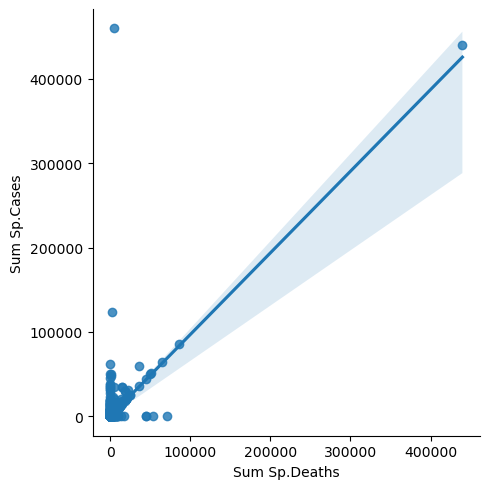

<Figure size 640x480 with 0 Axes>

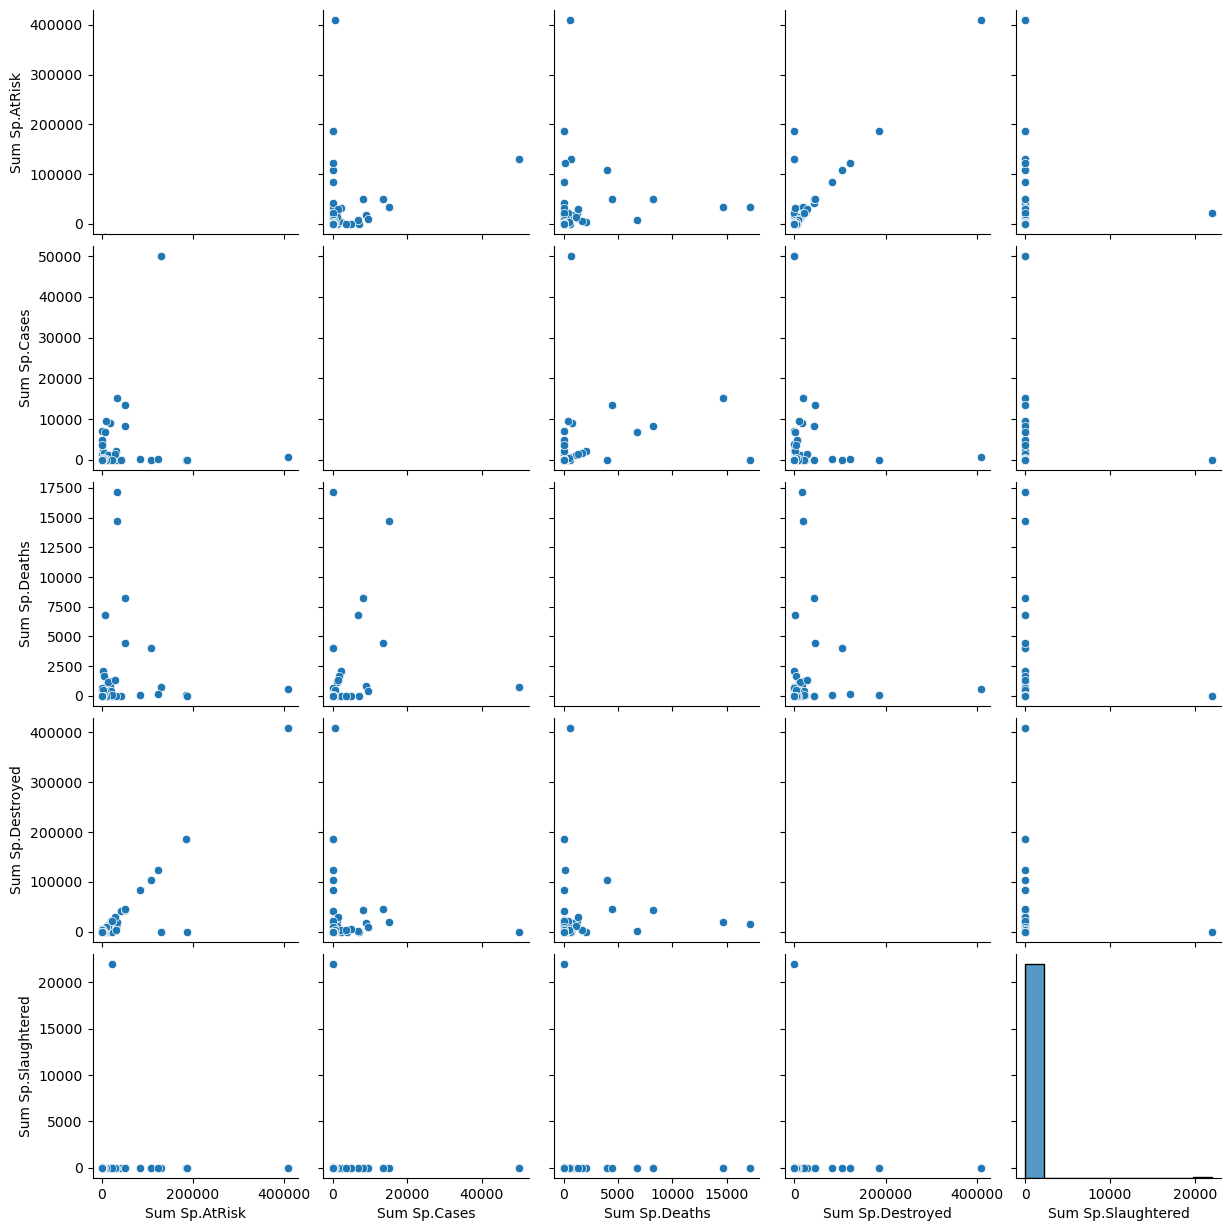

In [116]:
# Using the sample data created (Gemini AI generated)

plt.figure()  # Create a new figure
sns.pairplot(GADSub2_subset, diag_kind='hist', kind='scatter')
plt.show()
plt.savefig("Pair Plot.png")
plt.close() # Close the figure to release memory

In [ ]:
# This Original PairPlot code, it would not run

--g = sns.pairplot(GADSub2_subset)
plt.show()
plt.savefig("Pair Plot.png")--

#### Categorical Plots

##### Creating a categorical variable that splits the SumSp.Destroyed column into categories

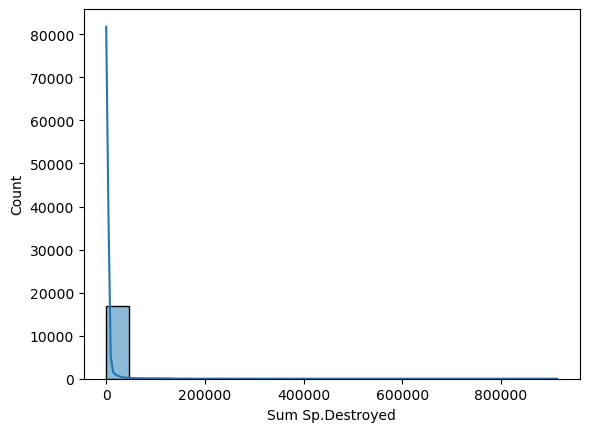

In [118]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the Sum Sp.Destroyed. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(GADSub['Sum Sp.Destroyed'], bins = 20, kde = True)
plt.show()

In [119]:
GADSub.loc[GADSub['Sum Sp.Destroyed'] < 250, 'Sp.Eradicated'] = 'Low Eradication'

C:\Users\jmesi\AppData\Local\Temp\ipykernel_21064\3494411474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GADSub.loc[GADSub['Sum Sp.Destroyed'] < 250, 'Sp.Eradicated'] = 'Low Eradication'


In [120]:
GADSub.loc[(GADSub['Sum Sp.Destroyed'] >= 250) & (GADSub['Sum Sp.Destroyed'] < 500), 'Sp.Eradicated'] = 'Middle Eradication'

In [121]:
GADSub.loc[GADSub['Sum Sp.Destroyed'] >= 500, 'Sp.Eradicated'] = 'High Eradication'

In [122]:
GADSub['Sp.Eradicated'].value_counts(dropna = False)

Sp.Eradicated
Low Eradication       15151
High Eradication       1716
Middle Eradication      141
Name: count, dtype: int64

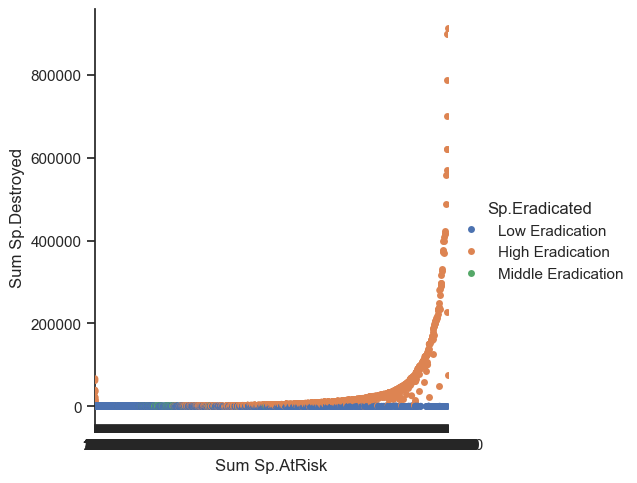

In [123]:
# Create a categorical plot in seaborn using the eradicated categories created above

sns.set(style="ticks")
g = sns.catplot(x="Sum Sp.AtRisk", y="Sum Sp.Destroyed", hue="Sp.Eradicated", data=GADSub)
plt.show()

In [124]:
# fig = g.get_figure()
g.savefig("CategoricalPlot_RiskvsDestroyed.png") 

# Again, the image will be saved in the working directory.

#### Exporting (pickle)

In [126]:
GADS.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'GADS_6.2PT1.pkl'))

In [127]:
GADS_vars.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'GADS_vars6.2.pkl'))